In [1]:
import numpy as np
from numpy import linalg
from scipy import linalg as splinalg
import matplotlib.pyplot as plt
from scipy import sparse as sp
import scipy.sparse.linalg
from functools import reduce
import itertools
from scipy import linalg
from scipy.linalg import expm
from scipy.special import comb
from itertools import combinations_with_replacement, product
from collections import Counter
import copy
from scipy.linalg import ishermitian

In [2]:
## Initial Script
params = {
    'N': 20, # no. of sites
    't':1.0, # Hopping Amplitude
    'localized_site': 10, # Localized site no.
    'T': 30, # Total time evolution
    'tau': 0.01 # time step
}
params['mu_list'] = [0, 0.3, 2.4, 3.5] 

In [3]:
def normalizeWF(psi,**kwargs):
    shape, dtype = psi.shape, psi.dtype
    NWF = psi
    if np.array_equal(psi, np.zeros(shape, dtype = dtype)) == True:
        NWF = psi
    elif np.vdot(psi, psi) == 0:
        NWF = psi
    else:
        NWF = psi/(np.sqrt(np.vdot(psi, psi)))
    return NWF

In [38]:
def one_particleQW_WF(params, **kwargs):
    '''
    Returns initial state of 1-particle on a tight-binding model
    based on 'localized_site'.
    '''
    psi0 = np.zeros(params['N'], dtype=complex)
    psi0[params['localized_site']] = 1.0
    return psi0

def one_particleQW_spread(params, **kwargs):
    '''
    kwargs: 'tilt'[Optional] to plot spread in tilted OL and its standard deviation.
    Returns plot of spread of the particle over time.
    '''
    N, psi0 = params['N'], one_particleQW_WF(params)
    std_devj=0
    t_list, psi_t = np.arange(0, params['T'], params['tau']), []
    H = np.zeros((N, N), dtype=complex)
    for i in range(N-1):
        H[i][i+1], H[i+1][i] = -params['t'], -params['t']
        if 'tilt' in kwargs:
            H[i][i] = -i*params['mu']
            if i == (N-2):
                H[i+1][i+1] = -(i+1)*params['mu']
            
    for i, t in enumerate(t_list):
        U = expm(-1j*H*t)
        psi_t +=  [U@psi0]
    
    probabilities = np.abs(np.array(psi_t))**2
    site_list = list(range(0, params['N'], 1))
    if 'tilt' in kwargs:
        std_deviation = []
        for i, prob in enumerate(probabilities):
            for j, pj in enumerate(prob):
                std_devj += ((j-params['localized_site'])**2)*pj
            std_deviation += [std_devj]
            std_devj=0
        fig, axs = plt.subplots(1, 2, figsize=(14, 6))  # Create a figure with 1 row and 2 columns
        
        # First subplot: Probability as a function of Site and Time
        c = axs[1].pcolormesh(site_list, t_list, probabilities, cmap=kwargs.get('colors2', 'Blues'))
        fig.colorbar(c, ax=axs[1], label='Probability') 
        axs[1].set_xlabel('Site')
        axs[1].set_ylabel('Time')
        axs[1].set_title(f'Probability as a function of Site and Time, Δ={params["mu"]}')

        # Second subplot: Standard Deviation vs Time
        axs[0].plot(t_list, std_deviation, color = kwargs['colors1'])
        axs[0].set_xlabel('Time')
        axs[0].set_ylabel('Standard Deviation')
        axs[0].set_title(f'Standard Deviation vs Time for Δ={params["mu"]}')
        axs[0].grid(True)
        plt.tight_layout() 
        plt.show()
    else:
        plt.figure(figsize=[7, 5])
        plt.pcolormesh(site_list, t_list, probabilities, cmap=kwargs.get('colors', 'Blues'))
        plt.colorbar(label='Probability') 
        plt.xlabel('Site')
        plt.ylabel('Time')
        plt.title('Probability as a function of Site and Time')
        plt.show()
    pass

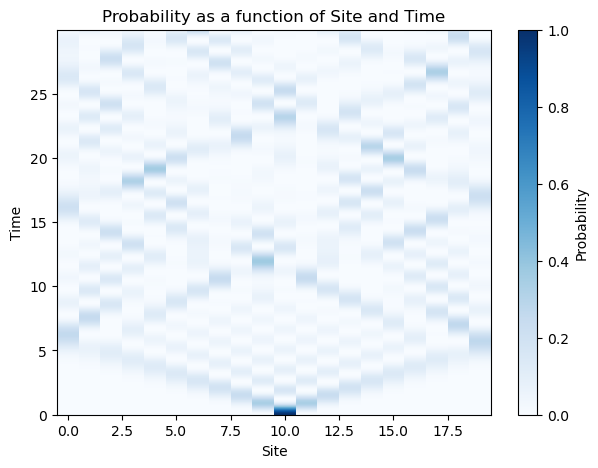

In [39]:
## Quantum Walk of one particle on tight binding lattice Hamiltonian
one_particleQW_spread(params, colors = plt.get_cmap('Blues'))

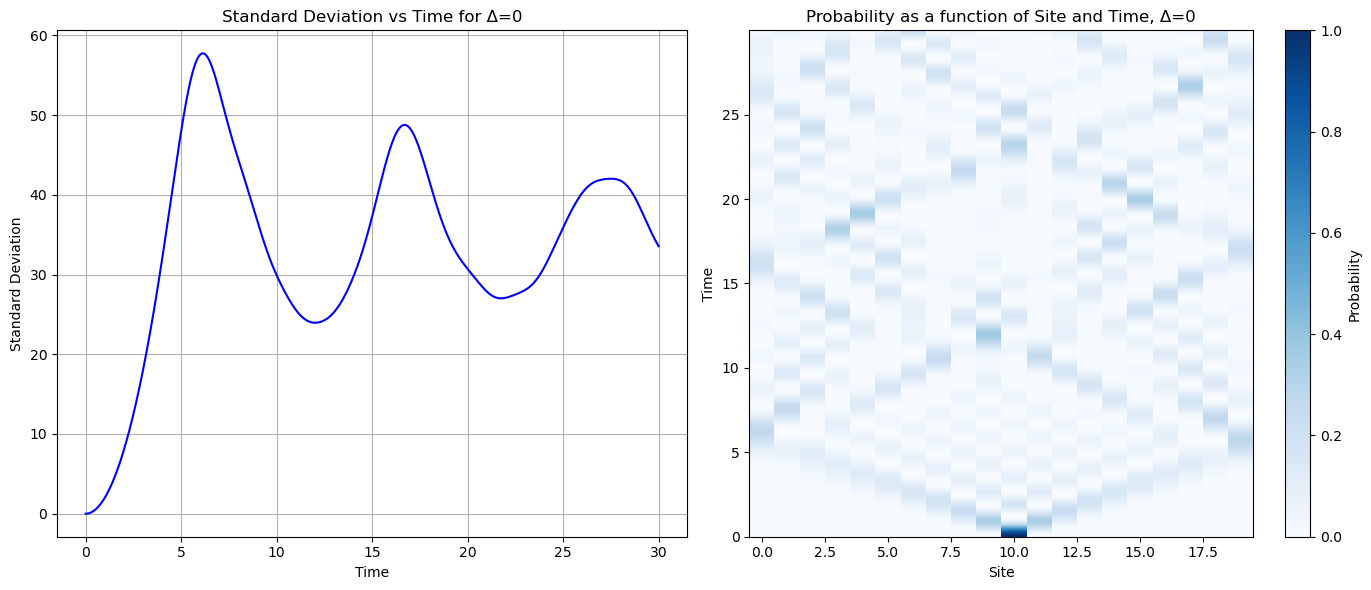

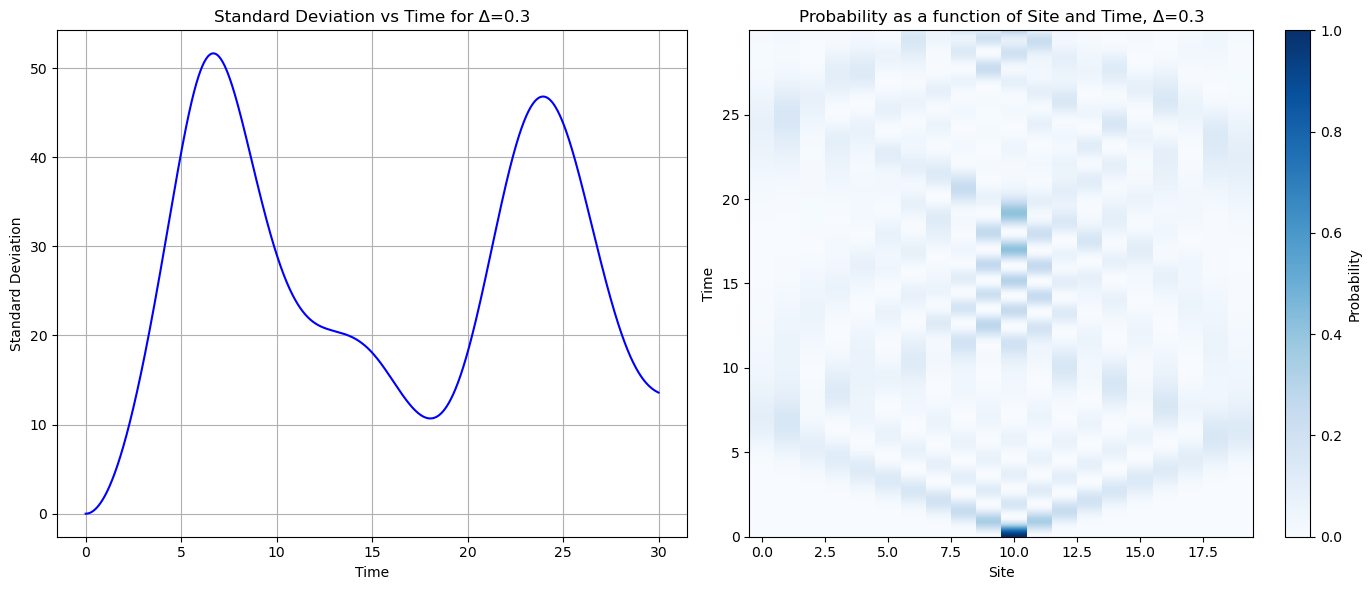

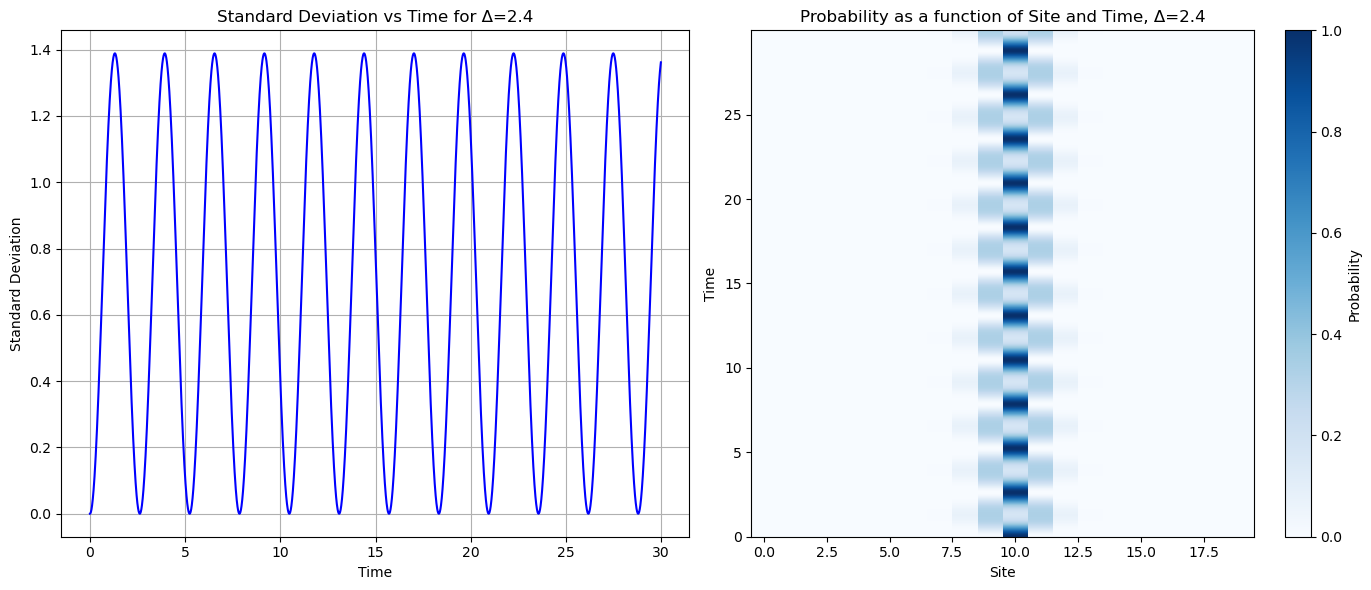

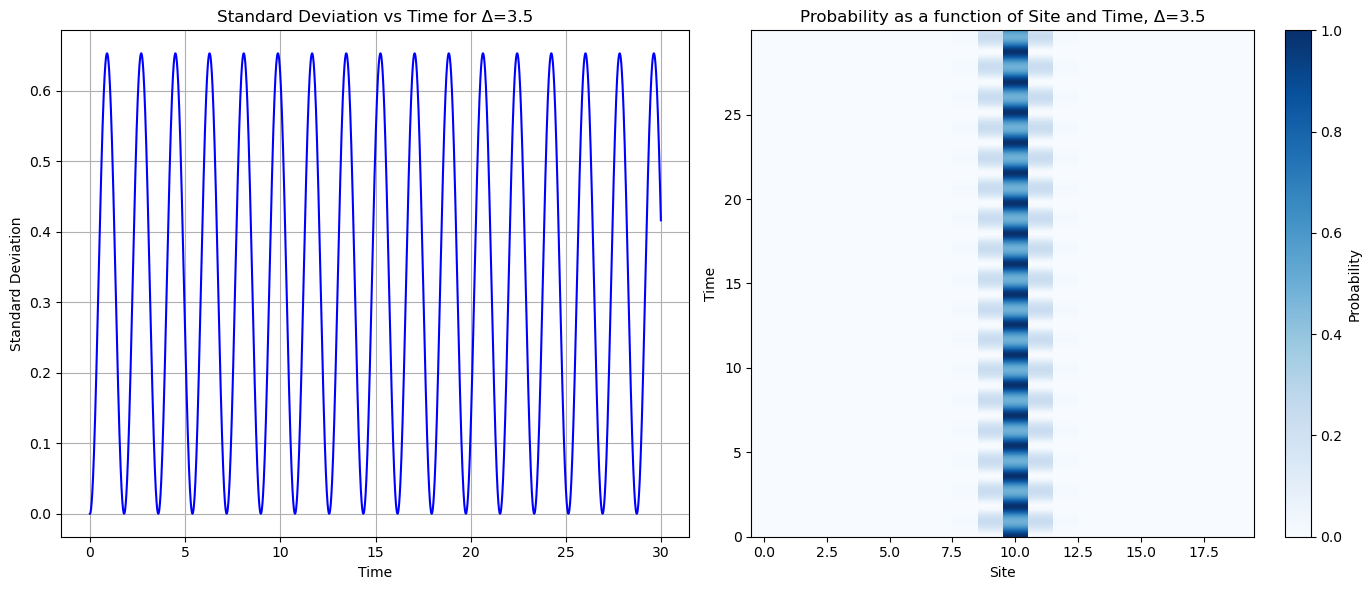

In [37]:
## Quantum Walk of one particle in a tilted Optical Lattice
params['T'] = 30
for mu in params['mu_list']:
    params['mu'] = mu
    # colors1 is for first subplot: standard deviation, 
    # colors2 for second subplot: density distribution
    one_particleQW_spread(params, tilt = True, colors1 = 'Blue', colors2 = plt.get_cmap('Blues'))